In [242]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pickle

In [3]:
losses = pickle.load( open( "losses.pickle", "rb" ) )

In [5]:
composition_vii = losses['composition_vii']
scream = losses['scream']
starry_night = losses['starry_night']

In [23]:
composition_vii = [np.sum(c.detach().numpy()) for c in composition_vii]
scream = [np.sum(c.detach().numpy()) for c in scream]
starry_night = [np.sum(c.detach().numpy()) for c in starry_night]

In [25]:
import matplotlib.pyplot as plt

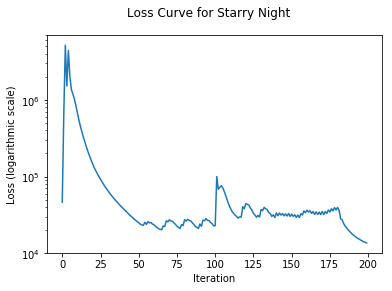

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(starry_night)
ax.set_yscale('log')
fig.suptitle('Loss Curve for Starry Night')
plt.xlabel('Iteration')
plt.ylabel('Loss (logarithmic scale)')
plt.show()

In [64]:
np.hstack((np.zeros((10,8))[:,:4],np.ones((10,8))[:,4:], np.zeros((10,8))[:,4:]))

array([[0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.]])

In [69]:
a = np.zeros((10,2,4))
b = np.ones((4,100))
(np.matmul(a,b) + np.ones((100,))).shape

(10, 2, 100)

In [ ]:
list(range(10,,-1))

In [71]:
np.matmul(np.zeros((10,5,2)).T, np.zeros((10,5,8))).shape

ValueError: shapes (2,5,10) and (10,5,8) not aligned: 10 (dim 2) != 5 (dim 1)

In [206]:
a = np.array(list(range(10*6*8))).reshape((10,6,8))

In [207]:
y = np.ones((10,6))
y *= np.array(list(reversed(range(6)))).reshape((1,-1))

In [209]:
a[range(10), range(6), y.astype(int)]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (10,) (6,) (10,6) 

In [195]:
a = np.ones((6,8))*range(8)

In [201]:
y = list(reversed(range(8)))[2:]

In [205]:
a[range(6),y]

array([5., 4., 3., 2., 1., 0.])

In [203]:
a

array([[0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.]])

In [218]:
np.ones((10,))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [228]:
a = np.array([range(1000),range(1000)])
a[1][0] = 1000

In [235]:
np.max(a,axis=1).reshape((2,-1))

array([[ 999],
       [1000]])

In [240]:
np.array(range(100)).reshape((10,5,2)).transpose((1,0,2)).shape

(5, 10, 2)

In [243]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2


class BoWClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, vocab_size):
        # calls the init function of nn.Module.  Dont get confused by syntax,
        # just always do it in an nn.Module
        super(BoWClassifier, self).__init__()

        # Define the parameters that you will need.  In this case, we need A and b,
        # the parameters of the affine mapping.
        # Torch defines nn.Linear(), which provides the affine map.
        # Make sure you understand why the input dimension is vocab_size
        # and the output is num_labels!
        self.linear = nn.Linear(vocab_size, num_labels)

        # NOTE! The non-linearity log softmax does not have parameters! So we don't need
        # to worry about that here

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return F.log_softmax(self.linear(bow_vec), dim=1)


def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])


model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the PyTorch devs, your module
# (in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

# To run the model, pass in a BoW vector
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    sample = data[0]
    bow_vector = make_bow_vector(sample[0], word_to_ix)
    log_probs = model(bow_vector)
    print(log_probs)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}
Parameter containing:
tensor([[-0.1681,  0.0928,  0.0612,  0.1073, -0.0777,  0.1419,  0.0764, -0.1288,
         -0.1158, -0.1100,  0.0334,  0.1774,  0.1841, -0.0003, -0.1359,  0.1892,
          0.0604,  0.0880,  0.0451,  0.1838,  0.1632, -0.0563,  0.0651, -0.1660,
         -0.0318,  0.1870],
        [ 0.0866, -0.0450, -0.1781, -0.1143, -0.1552, -0.0925,  0.0132, -0.0243,
         -0.0823,  0.0791, -0.0105,  0.1942,  0.1835,  0.0746, -0.1064,  0.0911,
          0.0037,  0.0823, -0.0035,  0.1314, -0.0735,  0.0087, -0.1147,  0.1050,
          0.1359,  0.0270]], requires_grad=True)
Parameter containing:
tensor([-0.1555, -0.1601], requires_grad=True)
tensor([[-0.4165, -1.0769]])


In [251]:
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}

In [254]:
# Run on test data before we train, just to see a before-and-after
with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Print the matrix column corresponding to "creo"
print(next(model.parameters())[:, word_to_ix["creo"]])

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(100):
    for instance, label in data:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = make_bow_vector(instance, word_to_ix)
        target = make_target(label, label_to_ix)
        
        print(target.shape)

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])

tensor([[-0.1453, -2.0008]])
tensor([[-3.2653, -0.0389]])
tensor([ 0.5500, -0.5271], grad_fn=<SelectBackward>)
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Siz